#Week 3: Supervised Learning - Classification Part II
-------------------------------------
**Guideline bersifat general. Silakan edit atau tambahkan cell sesuai dengan kebutuhan dataset masing-masing.**

## Import library

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array 

## Load Dataset

In [174]:
url = 'https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%203/Dataset/0706022010020.csv'
df = pd.read_csv(url)
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Preprocessing

Periksa apakah ada baris yang duplikat <br> Hint: gunakan function bawaan .duplicated



In [175]:
print(df.duplicated().value_counts())

False    5329
True     1168
dtype: int64


(add) Drop Duplicate

In [176]:
# drop duplicate
print("Jumlah data awal: ",df.shape)
df.drop_duplicates(keep='first', inplace=True)
print("Jumlah data akhir: ", df.shape)

Jumlah data awal:  (6497, 13)
Jumlah data akhir:  (5329, 13)


Periksa apakah ada missing values

In [177]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

(add) Mengisi null

In [178]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:,:] = imputer.fit_transform(df)
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(add) encode type

In [179]:
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

(add) info df

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5329 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5329 non-null   int32  
 1   fixed acidity         5329 non-null   float64
 2   volatile acidity      5329 non-null   float64
 3   citric acid           5329 non-null   float64
 4   residual sugar        5329 non-null   float64
 5   chlorides             5329 non-null   float64
 6   free sulfur dioxide   5329 non-null   float64
 7   total sulfur dioxide  5329 non-null   float64
 8   density               5329 non-null   float64
 9   pH                    5329 non-null   float64
 10  sulphates             5329 non-null   float64
 11  alcohol               5329 non-null   float64
 12  quality               5329 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 562.0 KB


(add) describe

In [181]:
df.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000,5329.000000
mean,0.744980,7.215791,0.344027,0.318728,5.052543,0.056661,30.060143,114.189341,0.994536,3.224325,0.533243,10.548539,5.796022
std,0.435913,1.318078,0.168120,0.147076,4.503657,0.036840,17.815588,56.781422,0.002966,0.160161,0.149671,1.186134,0.879922
min,0.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,0.000000,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,75.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,1.000000,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994640,3.210000,0.510000,10.400000,6.000000
75%,1.000000,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,154.000000,0.996770,3.330000,0.600000,11.400000,6.000000
max,1.000000,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


(add) Visualisasi type

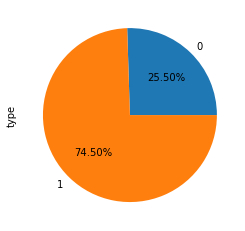

In [182]:
data = df.groupby("type")["type"].count()
data.plot(kind='pie', autopct='%1.2f%%')
plt.show()

(add) Visualisasi per grade

<AxesSubplot:xlabel='quality', ylabel='count'>

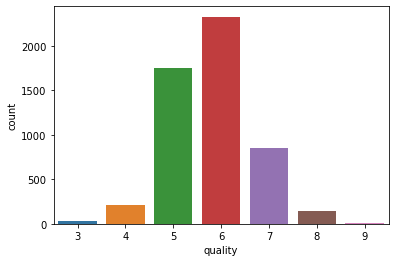

In [183]:
sns.countplot(x="quality", data=df)

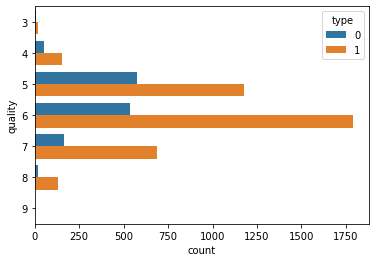

In [184]:
sns.countplot(y ='quality', hue = "type", data = df)
plt.show()

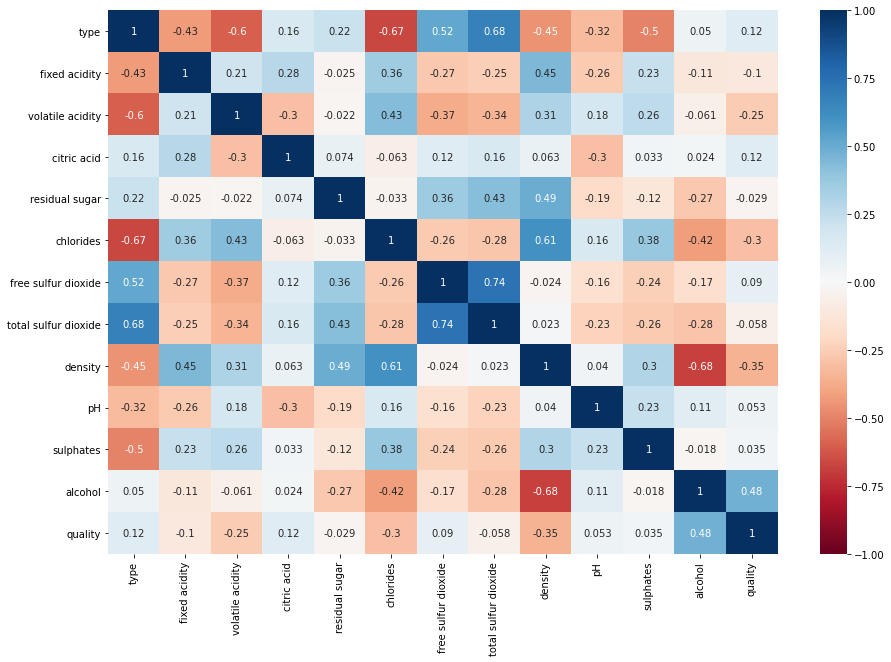

In [185]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='spearman'), cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.show()



Pisahkan dataset menjadi variabel independen dan variabel dependen

In [211]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [189]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression

Bangun model dan ukur accuracy nya. Pasang random state = 0

In [190]:
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Uji model dengan dataset test

In [191]:
log_y_pred = log_classifier.predict(X_test)

Cetak confusion matrix dan akurasi modelnya

In [192]:
log_cm = confusion_matrix(y_test, log_y_pred)
print("Confusion Matrix:\n", log_cm)
print("LOG Accuracy Score: ", accuracy_score(y_test, log_y_pred))

Confusion Matrix:
 [[  0   1   0   2   1   0   0]
 [  0   4  14   7   1   0   0]
 [  0   2  93  65   0   0   0]
 [  0   0  59 165  17   0   0]
 [  0   0   4  59  15   0   0]
 [  0   0   0  18   4   0   0]
 [  0   0   0   1   1   0   0]]
LOG Accuracy Score:  0.5196998123827392


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

In [1]:
knn_classifier = KNeighborsClassifier(n_neighbors = 21, metric = "euclidean", p = 2)
knn_classifier.fit(X_train, y_train)

NameError: name 'KNeighborsClassifier' is not defined

Text(0, 0.5, 'Error Rate')

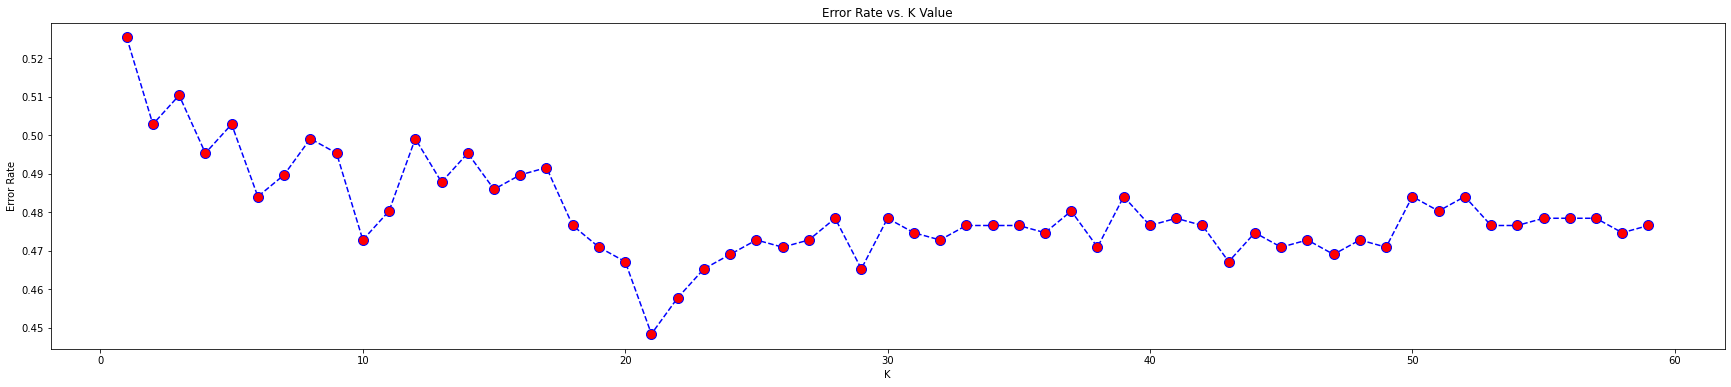

In [202]:
error_rate = []
# Will take some time
for i in range(1,60):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(30,6))
plt.plot(range(1,60),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Uji model dengan data test

In [203]:
knn_y_pred = knn_classifier.predict(X_test)

Cetak confussion matrix dan akurasi modelnya

In [204]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
print("Confusion Matrix:\n", knn_cm)
print("KNN Accuracy Score: ", accuracy_score(y_test, knn_y_pred))

Confusion Matrix:
 [[  0   0   2   2   0   0   0]
 [  0   1  13  12   0   0   0]
 [  0   0 106  52   2   0   0]
 [  0   1  56 161  23   0   0]
 [  0   0   2  49  26   1   0]
 [  0   0   0  10  12   0   0]
 [  0   0   0   2   0   0   0]]
KNN Accuracy Score:  0.551594746716698


# Naive Bayes (Optional)

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

In [205]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

Uji hasil model dengan data test

In [206]:
nb_y_pred = nb_classifier.predict(X_test)

Cetak confussion matrix dan akurasi modelnya

In [207]:
nb_cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix:\n", nb_cm)
print("Naive Bayes Accuracy Score: ", accuracy_score(y_test, nb_y_pred))

Confusion Matrix:
 [[ 1  0  1  1  1  0  0]
 [ 0  5  9 10  2  0  0]
 [ 3  3 89 55  9  0  1]
 [ 0  7 63 98 61  5  7]
 [ 1  2  9 22 35  3  6]
 [ 0  0  0  8 12  1  1]
 [ 0  0  0  1  1  0  0]]
Naive Bayes Accuracy Score:  0.42964352720450283


#Kesimpulan
Dari model-model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

In [208]:
print("Kesimpulan dari model-model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah KNN dengan akurasi score", accuracy_score(y_test, knn_y_pred))

Kesimpulan dari model-model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah KNN dengan akurasi score 0.551594746716698
